# Tellurics guide

The classes and methods in `telluricutils` allow to:
- Read and plot telluric models generated with the ESO ESO Sky Model Calculator (https://www.eso.org/observing/etc/skycalc Noll et al. 2012)
- Create telluric masks (0110) from models
- Broaden telluric lines by a specific velocity
- Plot telluric masks

The script `tellmask` read a SkyCalc model and creates a mask out of it, masking telluric lines below a certain depth.

In [1]:
import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from popurri import peakutils
from popurri import plotutils
from popurri.plotutils import wavelength_label
from popurri import telluricutils

plotutils.mpl_custom_basic()
plotutils.mpl_size_same(font_size=18)

## `telluricutils` functions

### Reading and plotting a mask

In [2]:
# TODO

### Broadening the lines of a mask by a certain velocity

In [3]:
# TODO

## `tellmask` script

### Quick start

You can see the arguments that the script takes by running `tellmask -h`:

In [4]:
!tellmask -h

usage: tellmask [-h] [--tpltype {esoskycalc}]
                [--fk {ftransmission,trans_o3,trans_ma,trans_rs,trans_ms}]
                [--wmin WMIN] [--wmax WMAX] [--lisfcut LISFCUT [LISFCUT ...]]
                [--dw DW] [--npixmin NPIXMIN] [--depthmin DEPTHMIN]
                [--dirout DIROUT] [--diroutplot DIROUTPLOT]
                [--filoutmask FILOUTMASK] [--cmap CMAP] [--pltsv] [--pltsh]
                [--pltext PLTEXT [PLTEXT ...]] [--verbose] [--pause]
                filtpl

`tellmask_from_esoskycalc.py` Build a telluric mask from a spectrum obtained
with the ESO Sky Model Calculator (https://www.eso.org/observing/etc/skycalc
Noll et al. 2012).

positional arguments:
  filtpl                Input spectrum file.

options:
  -h, --help            show this help message and exit
  --tpltype {esoskycalc}
                        Input model type.
  --fk {ftransmission,trans_o3,trans_ma,trans_rs,trans_ms}
                        Flux key to be used.
  --wmin WMIN           Mi

We are going to run the script with some example model provided here.

These are the example models provided:

In [5]:
dirhere = os.path.abspath('')
dirdata = os.path.join(dirhere, '../../popurri/data/esoskycalc/')  # Directory with the example data
!echo {dirdata}
!ls {dirdata}

/Users/marina/work/code/popurri/docs/guides/../../popurri/data/esoskycalc/


lasilla_w300-1000_R100000_FWHM3.20bin_vac.fits
lasilla_w300-1000_R100000_FWHM3.20bin_vac_inputconfig.txt
paranal_w300-1000_R138000_FWHM4.50bin_vac.fits
paranal_w300-1000_R138000_FWHM4.50bin_vac_inputconfig.txt
paranal_w900-5400_R100000_FWHM5.0bin_vac.fits
paranal_w900-5400_R100000_FWHM5.0bin_vac_inputconfig.txt


We are going to generate several masks (including tellurics of different depths) using the model `lasilla_w300-1000_R100000_FWHM3.20bin_vac.fits`.

The next cell runs the script. You can change the `dirout` argument to a known location to see the outputs easily.

In [6]:
filmod = 'lasilla_w300-1000_R100000_FWHM3.20bin_vac.fits'
dirout = os.path.join(dirhere, 'telluric/')
!tellmask {dirdata}/{filmod} --wmin 3600 --wmax 7100 --fk trans_ma --dirout {dirout} --diroutplot {dirout} --pltext png --pltsv --verbose



##################################################

Create telluric mask from a telluric model

##################################################


Input spectrum model: /Users/marina/work/code/popurri/docs/guides/../../popurri/data/esoskycalc//lasilla_w300-1000_R100000_FWHM3.20bin_vac.fits (esoskycalc, using trans_ma flux key)
Include tellurics below: [0.9, 0.95, 0.99, 0.995, 0.999, 0.9995, 0.9999]
Mask w limits: 3600.0 to 7100.0 A
Masks saved in: /Users/marina/work/code/popurri/docs/guides/telluric/
Plots saved in: /Users/marina/work/code/popurri/docs/guides/telluric/
Reading input spectrum /Users/marina/work/code/popurri/docs/guides/../../popurri/data/esoskycalc//lasilla_w300-1000_R100000_FWHM3.20bin_vac.fits
Cutting w from 3600.0 to 7100.0 A
Plotting spectrum
Finding lines
Plot: Removing lines with less than 3 pixels
Plot: Removing lines with more than 0.99995 depth
Plotting initial lines
Making mask including lines with more than {args.lisfcut} depth
Telluric mask saved: /Users

These are the outputs from the script:

In [7]:
!ls {dirout}

lasilla_w300-1000_R100000_FWHM3.20bin_vac_mask_fcut0.900000.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_mask_fcut0.950000.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_mask_fcut0.990000.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_mask_fcut0.995000.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_mask_fcut0.999000.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_mask_fcut0.999500.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_mask_fcut0.999900.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_masks.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_masks_panels.png
lasilla_w300-1000_R100000_FWHM3.20bin_vac_masks_zoomy1.png
mask_lasilla_w300-1000_R100000_FWHM3.20bin_vac_fcut0.900000_npixmin3.mas
mask_lasilla_w300-1000_R100000_FWHM3.20bin_vac_fcut0.950000_npixmin3.mas
mask_lasilla_w300-1000_R100000_FWHM3.20bin_vac_fcut0.990000_npixmin3.mas
mask_lasilla_w300-1000_R100000_FWHM3.20bin_vac_fcut0.995000_npixmin3.mas
mask_lasilla_w300-1000_R100000_FWHM3.20bin_vac_fcut0.999000_npixmin3.mas
mask_lasilla_w300

The masks generated can be easily used with the methods in `telluricutils`.

Let's visualise the plot with the model specturm and all the masks generated:

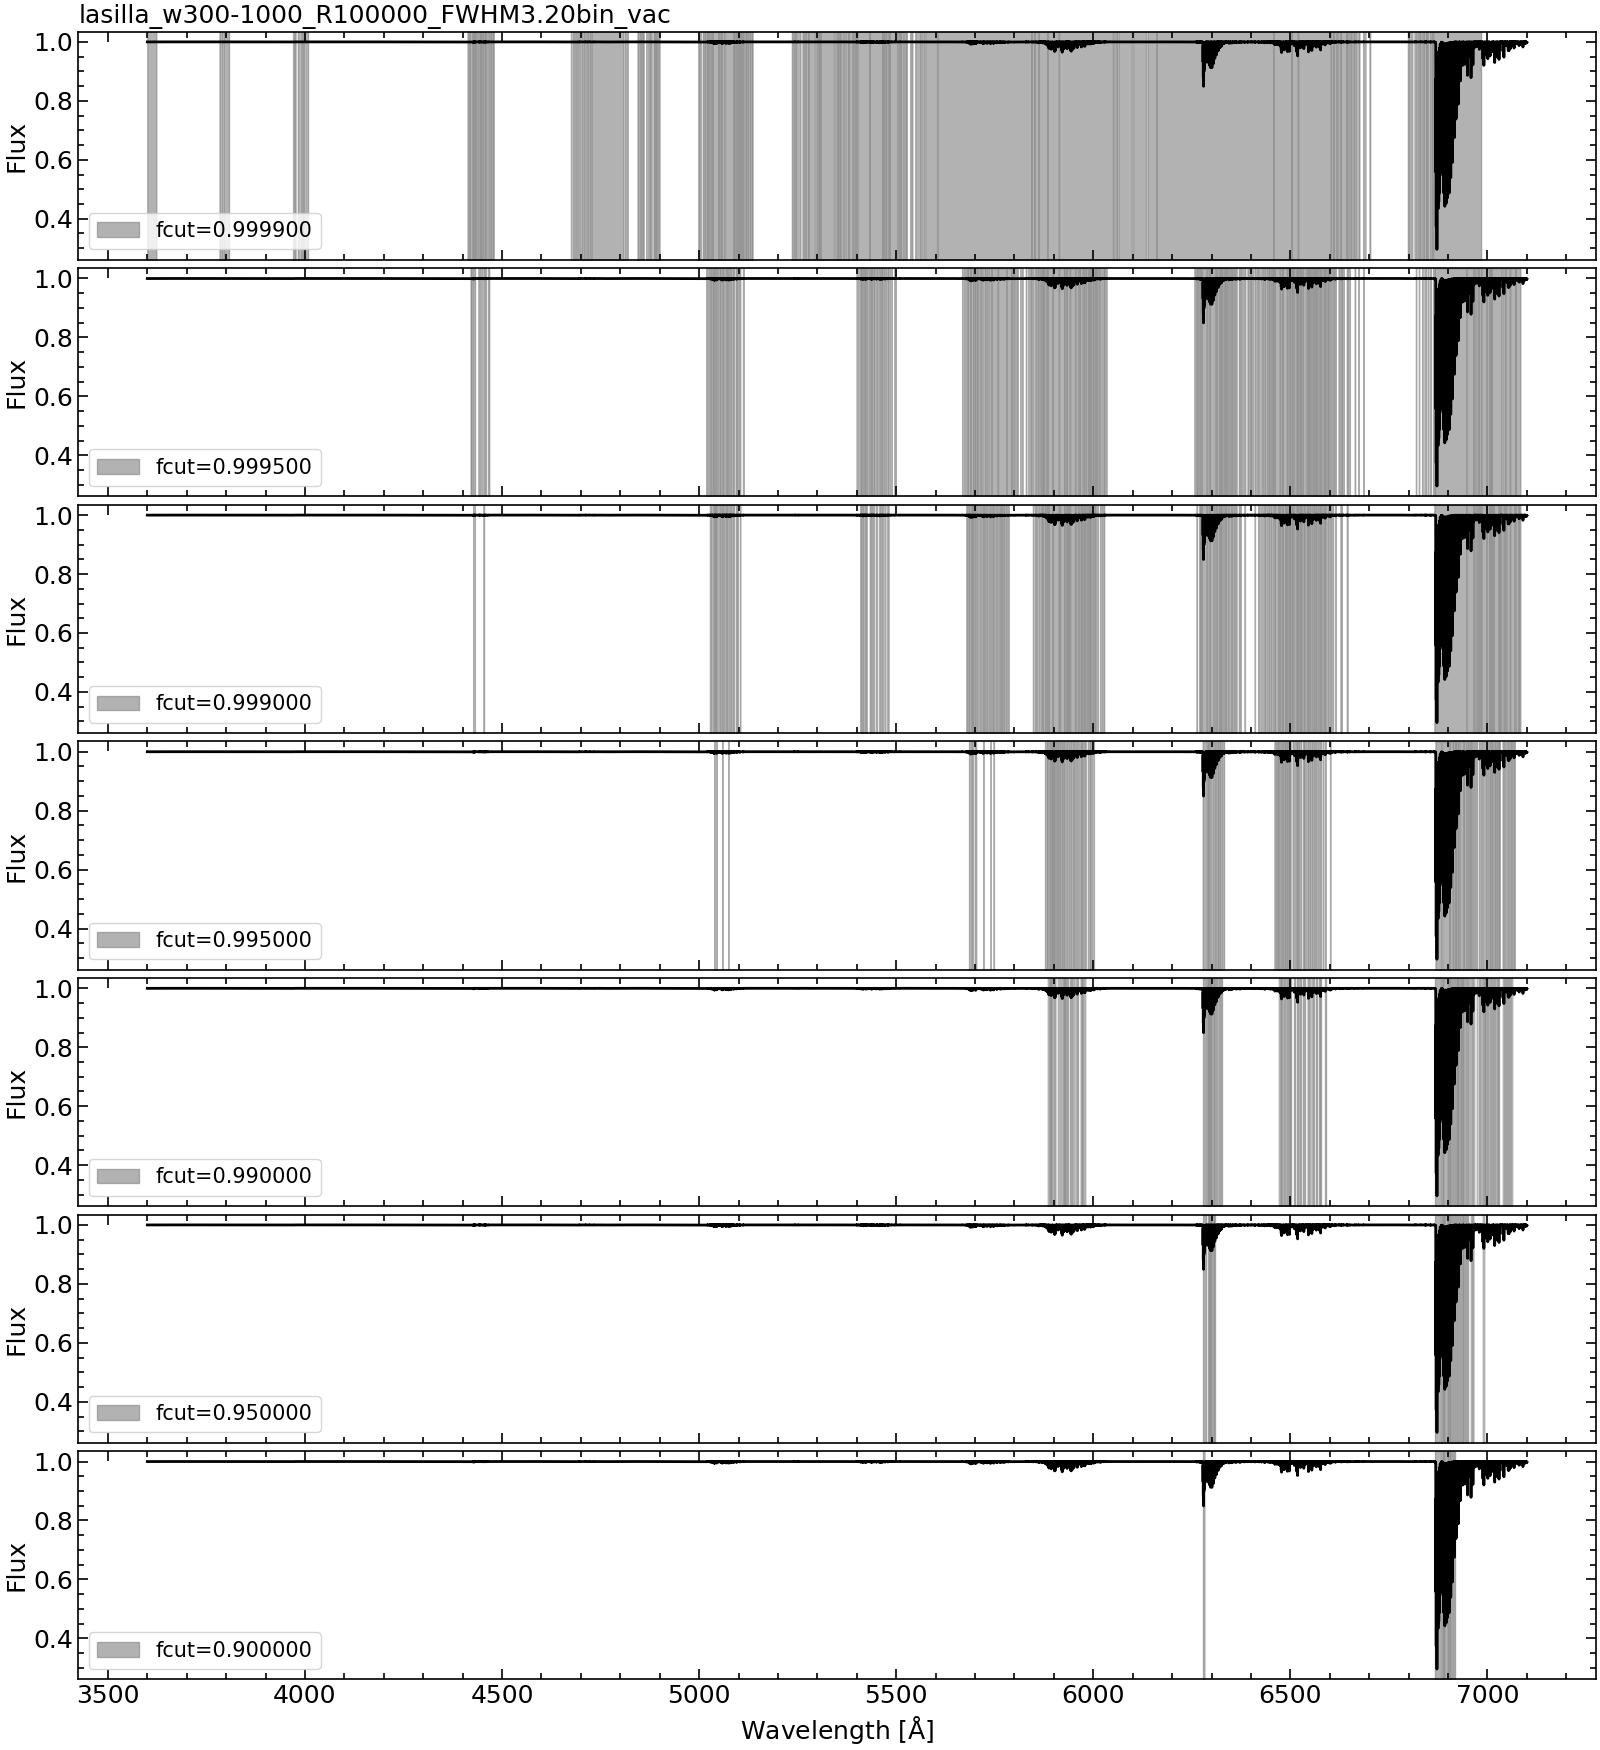

In [8]:
from IPython.display import Image

filmodname = os.path.splitext(os.path.basename(filmod))[0]

fig = Image(filename=(os.path.join(dirout, f'{filmodname}_masks_panels.png')))
fig


Here are the same masks all in the same panel:

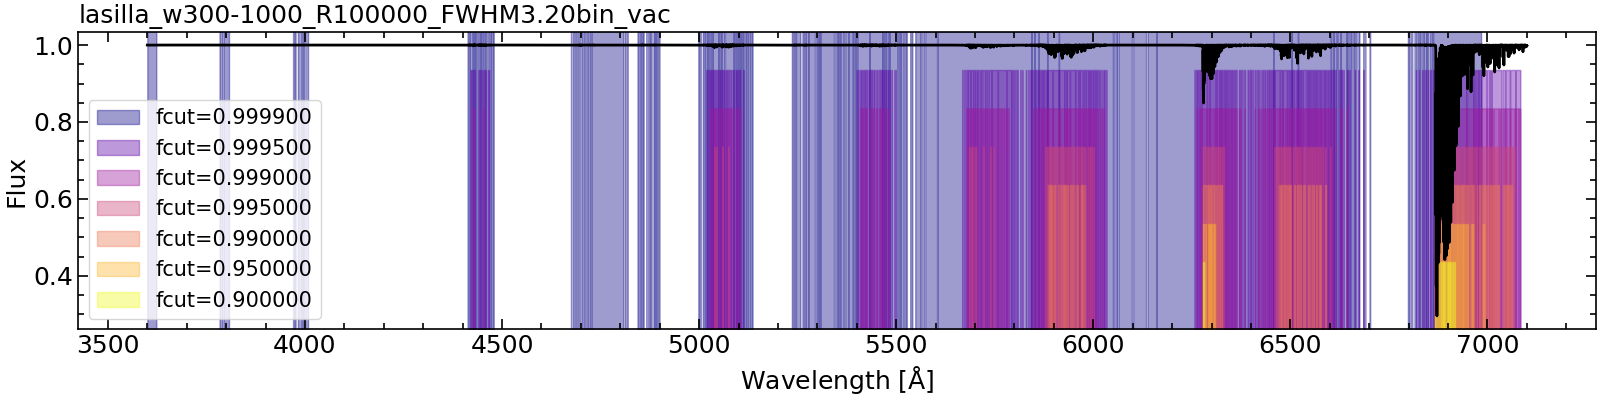

In [9]:
from IPython.display import Image

filmodname = os.path.splitext(os.path.basename(filmod))[0]

fig = Image(filename=(os.path.join(dirout, f'{filmodname}_masks.png')))
fig


And this is a zoomed-in version to the top 1% of the model, again with all the masks together:

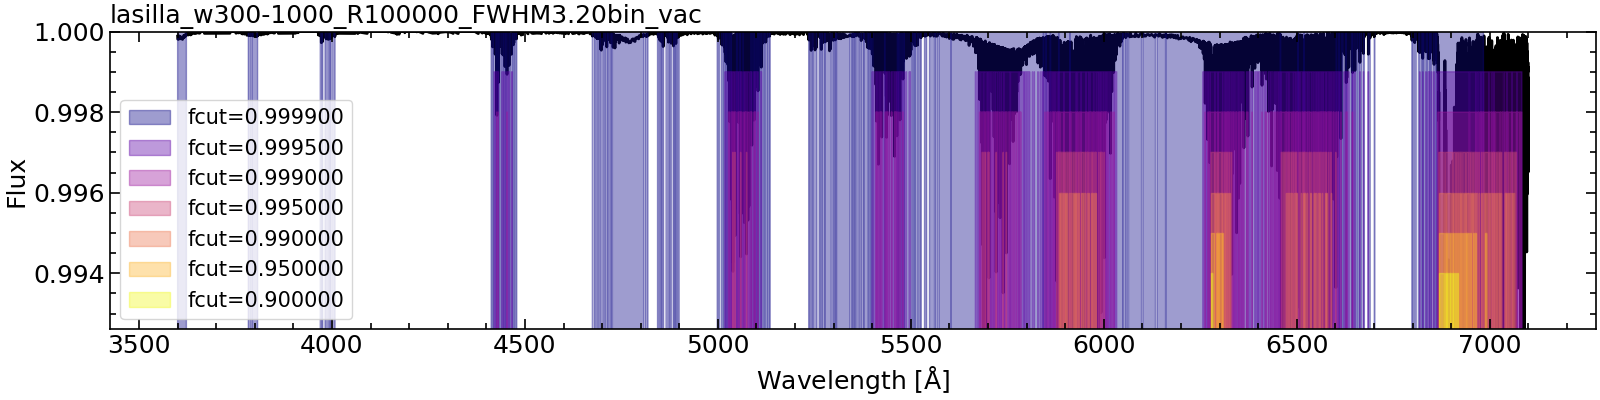

In [10]:
figz = Image(filename=(os.path.join(dirout, f'{filmodname}_masks_zoomy1.png')))
figz

### In detail

Here we follow what the script does step by step.

In [11]:
# TODO